<a href="https://colab.research.google.com/github/CamiloLon/Evaluacion_2021-1/blob/main/1000417189/Examen_2021_1_02_1000417189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [1]:
#LIBRERÍAS
import pandas as pd
import numpy as np
import scipy as sp

from scipy import misc
from scipy import optimize
from scipy import integrate

import matplotlib.pyplot as plt


#Parte A


In [2]:

path='https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json'
df1=pd.read_json(path)

t=df1['hours']
s=df1['followers']

coef= np.polyfit(t,s,2)
px=np.poly1d(coef)
print(px)
df1

           2
-0.002438 x + 8.552 x + 4.276e+04


,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [3]:
# 1. La velocidad inicial de incremento de seguidores en followers/hour
v0=misc.derivative(px,t[0])
print('Velocidad inicial:',v0,'seguidores/hora')

Velocidad inicial: 8.552137792663416 seguidores/hora


In [4]:
# 2. La aceleración constante en followers/hour**2
# Podemos hallar la aceleración sin derivar como en el punto anterior
# al despejar del primer coeficiente a/2=-0.002438, siendo así:
a=2*coef[0]
print('Aceleración constante:',a, 'followers/hour**2')

Aceleración constante: -0.0048752543859773 followers/hour**2


In [13]:
# 3. El número máximo de seguidores que alcanzaría el perfil

max=optimize.fmin_powell(-px,0,disp=False)
print('El número máximo será:',px(max))

El número máximo será: 50262.136729011865


In [6]:
# 4. La fecha en la que se alcanzaría dicho máximo

import datetime as dt
hora=float(max)
fecha= df1['date_time'][0]+dt.timedelta(hours=hora)
print('La fecha del máximo será:',str(fecha))

La fecha del máximo será: 2021-10-17 00:18:28.966858


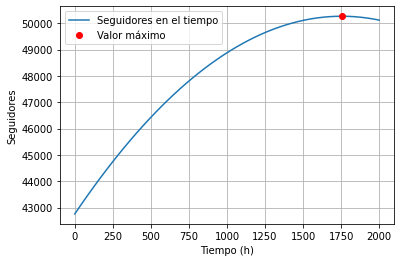

In [7]:
X_=np.linspace(0,2000)

plt.figure()
plt.plot(X_,px(X_),label='Seguidores en el tiempo')
plt.plot(max,px(max),'ro',label='Valor máximo')
plt.grid()
plt.xlabel('Tiempo (h)')
plt.ylabel('Seguidores')
plt.legend()
plt.show()

#Parte B


$$\frac{T}{T_0}=\frac{2 }{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}$$



In [8]:
#Parte B

# 1. Escriba un programa que use la anterio integral para calcular el cociente  T/T0  para ángulos enteros (en grados)
def r(alpha):
  #Convertir los ángulos a radianes en un array
  alpha=np.deg2rad(alpha)
  #definir la función para el integrando
  f=lambda phi: (1-np.sin(alpha/2)**2*np.sin(phi)**2)**(-1/2)
  #Vectorizar la función de integración para calcular con varios ángulos
  integ=(sp.vectorize(integrate.quad))
  #integrar todas las funciones entre 0 y 2pi
  i=integ(f,0,np.pi/2)[0]
  #multiplicar por el factor 
  return (2/np.pi)*i
#Vectorizar también la función 
R=sp.vectorize(r)

In [9]:
# 2. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente  T/T0
df2=pd.DataFrame()
#linspace de tamaño con enteros de 0 a 90:
alpha=np.linspace(0,90,91)

df2["A_deg"]=alpha
df2["A_rad"]=np.deg2rad(alpha)
df2["T/T_0"]=R(alpha)
df2

,A_deg,A_rad,T/T_0
0,0.0,0.000000,1.000000
1,1.0,0.017453,1.000019
2,2.0,0.034907,1.000076
3,3.0,0.052360,1.000171
4,4.0,0.069813,1.000305
...,...,...,...
86,86.0,1.500983,1.162214
87,87.0,1.518436,1.166617
88,88.0,1.535890,1.171105
89,89.0,1.553343,1.175679


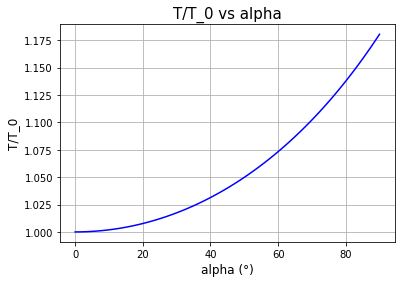

In [10]:
# 3. Haga un gráfico de  T/T0  como función de  α  (en grados).
plt.figure()
plt.title('T/T_0 vs alpha', fontsize=15)
plt.plot(alpha, df2["T/T_0"],'b')
plt.xlabel('alpha (°)',fontsize=12)
plt.ylabel('T/T_0',fontsize=12)
plt.grid()
plt.show()

### 4. Explain the result when $\alpha = 0$
Cuando $\alpha = 0$ la integral se convierte en $\int_0^{\frac{\pi}{2}} d\theta=\frac{\pi}{2}$ y en consecuencia $T/T_0=1$. Es decir $T=T_0$, ya que $T_0$ se usa para amplitudes que tienden a 0